In [1]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('data/dogs_n_cats.csv').rename(columns={
    'Длина':'length',
    'Высота':'height',
    'Шерстист':'woolly',
    'Гавкает':'barks',
    'Лазает по деревьям':'climbs',
    'Вид':'species'})

In [4]:
df = pd.get_dummies(df)

In [5]:
X_train = df.iloc[:,0:5]
y_train = df.species_собачка

In [6]:
X_train.head()

,length,height,woolly,barks,climbs
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [7]:
max_depth_values = range(1,100)

In [8]:
scores_data = pd.DataFrame()

In [9]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({
        'max_depth':[max_depth], 
        'train_score':[train_score], 
        'cross_val_score':[mean_cross_val_score]
    })
    scores_data = pd.concat([scores_data, temp_score_data])

In [10]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score','cross_val_score'], 
                           var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

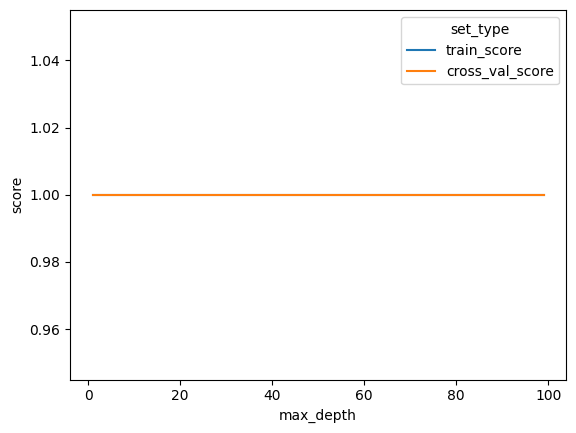

In [11]:
sns.lineplot(scores_data_long, x='max_depth', y='score', hue='set_type')

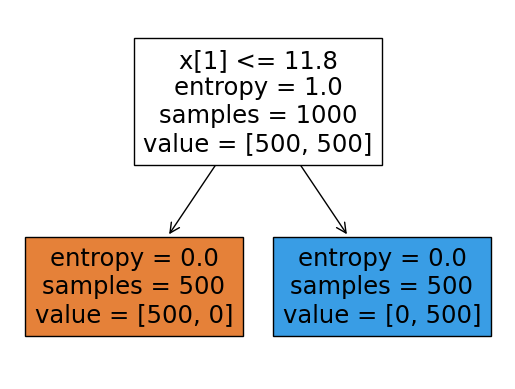

In [12]:
a = tree.plot_tree(clf, filled=True)

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

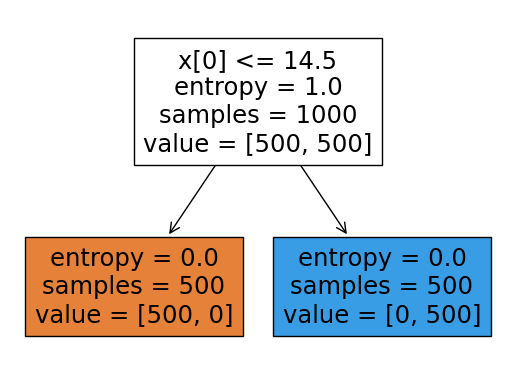

In [17]:
a = tree.plot_tree(clf, filled=True)

In [24]:
test = pd.read_json('data/dataset_209691_15.txt').rename(columns={
    'Длина':'length',
    'Высота':'height',
    'Шерстист':'woolly',
    'Гавкает':'barks',
    'Лазает по деревьям':'climbs'})

In [25]:
test

,length,height,woolly,barks,climbs
0,34,40.8,1,1,0
1,34,40.8,1,1,0
2,30,36.0,1,1,0
3,23,27.6,1,1,0
4,22,26.4,1,1,0
...,...,...,...,...,...
95,13,5.2,0,0,0
96,12,4.8,1,0,1
97,10,4.0,1,0,1
98,7,2.8,1,0,1


In [26]:
clf.predict(test).sum()

51